In [1]:
#importing the necessary modules
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime as dt
import matplotlib.pyplot as plt

## Atabey's Comments

### Q1 ( 50pts / 50pts)

Nicely done. I especially like the function `Compute`.

### Q2 ( 50pts / 50pts)

Tight, clean, easy to read. Nicely done!

here I pull the desired data from the desired site using the appropriate api and assign it to the data variable

In [301]:
data = pd.read_json("https://cckpapi.worldbank.org/cckp/v1/era5-x0.5_timeseries_pr,tas_timeseries_monthly_1950-2020_mean_historical_era5_era5_mean/ESP,REU,MCO,ITA,SVN,HRV,BIH,MNE,ALB,GRC,TUR,SYR,LBN,ISR,PSE,EGY,LBY,TUN,DZA,MAR,CYP,MLT?_format=json")

Here, I assign the Temperature and Preciptitation data to variables to be used appropriately from the data I extracted with the api

In [302]:
Temperature = pd.DataFrame.from_dict(data["data"].tas)
Precipitation = pd.DataFrame.from_dict(data["data"].pr)

I get a data with the Compute function and resample this data according to the desired format, calculate the average of months or years and create a new dataframe, then return this dataframe to use

In [303]:
def Compute(data,frmt):
    index = [dt.strptime(i, "%Y-%m") for i in data.index]
    index = [dt.strftime(i, frmt) for i in index]
    data.index = index
    data = data.groupby(data.index).mean()

    return data



Here I calculate the desired data in the desired format with the compute function and assign it to variables with the desired name

In [304]:
MAST = Compute(Temperature.copy(),"%m")
MAPR = Compute(Precipitation.copy(),"%m")
YAST = Compute(Temperature.copy(),"%Y")
YAPR = Compute(Precipitation.copy(),"%Y")


With this function, I show the data using a line plot. In the cells at the bottom, there are representations of the data using this function

In [321]:
def PlotData(data):
    data.plot.line(figsize = (18,8))
    plt.legend(loc = "upper right")
    plt.show()

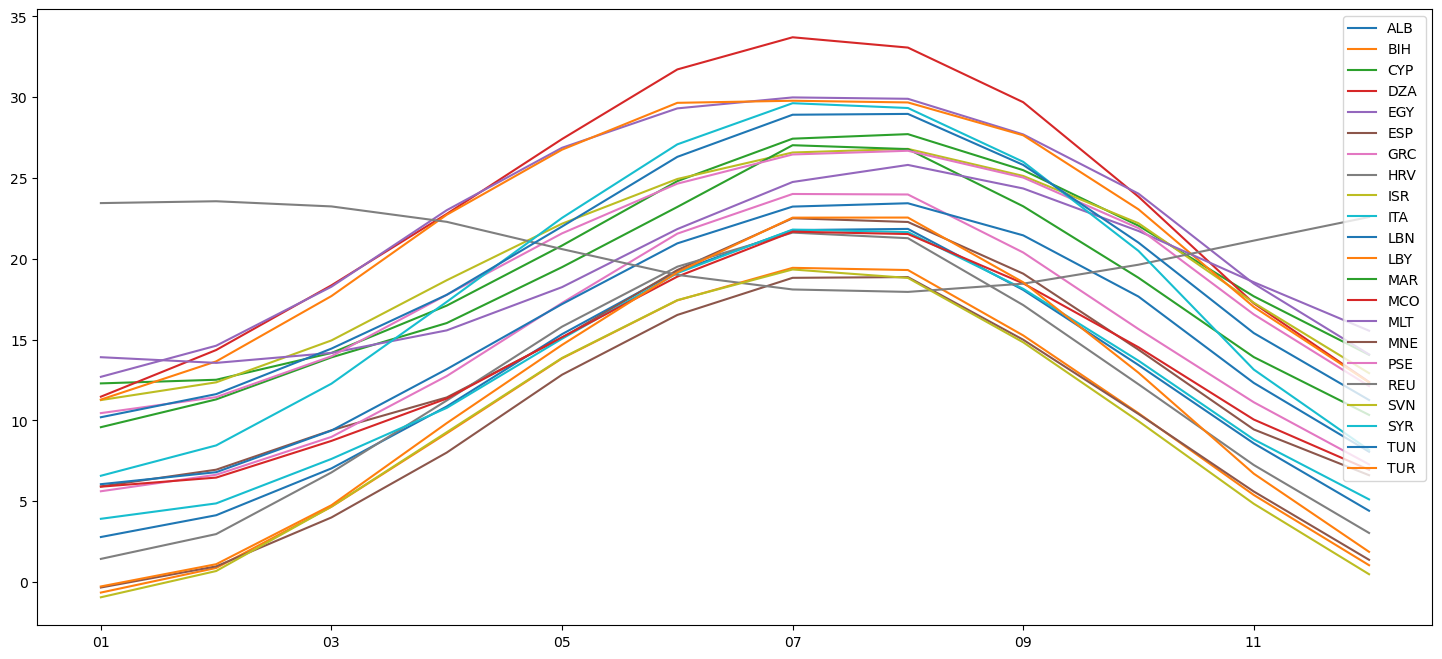

In [322]:
PlotData(MAST)

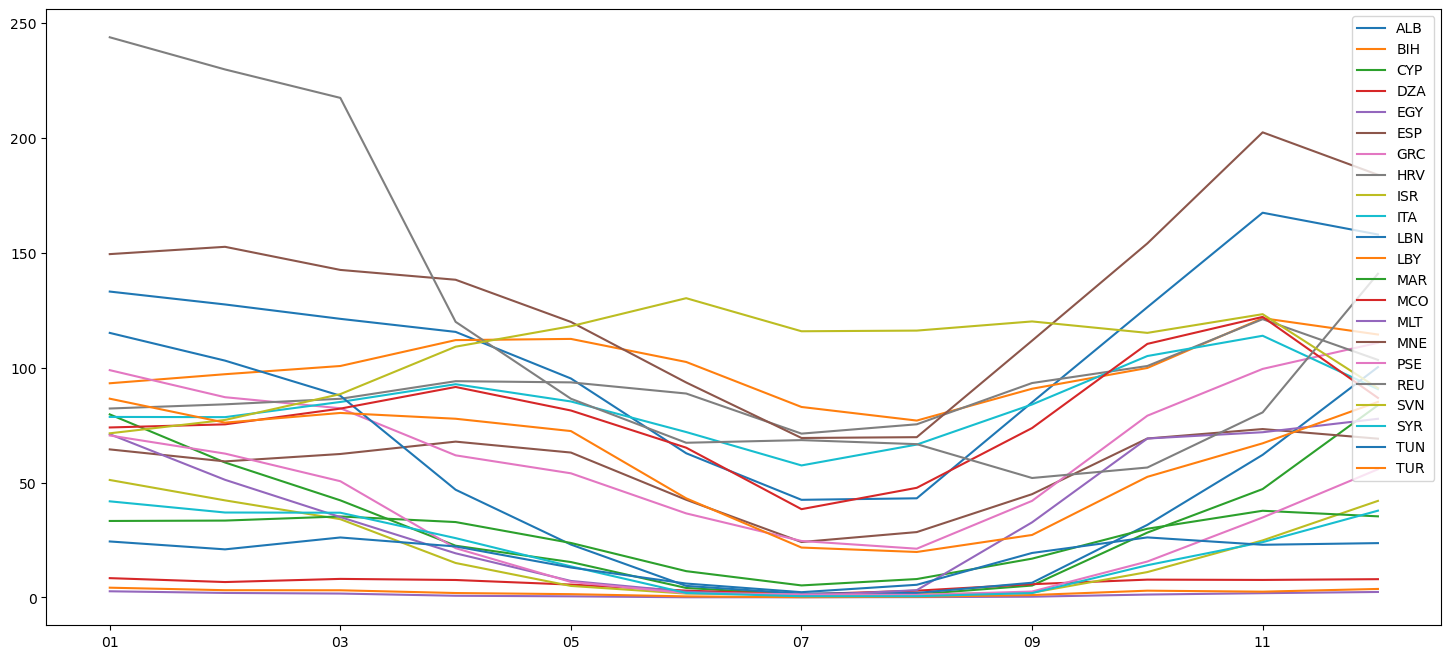

In [323]:
PlotData(MAPR)

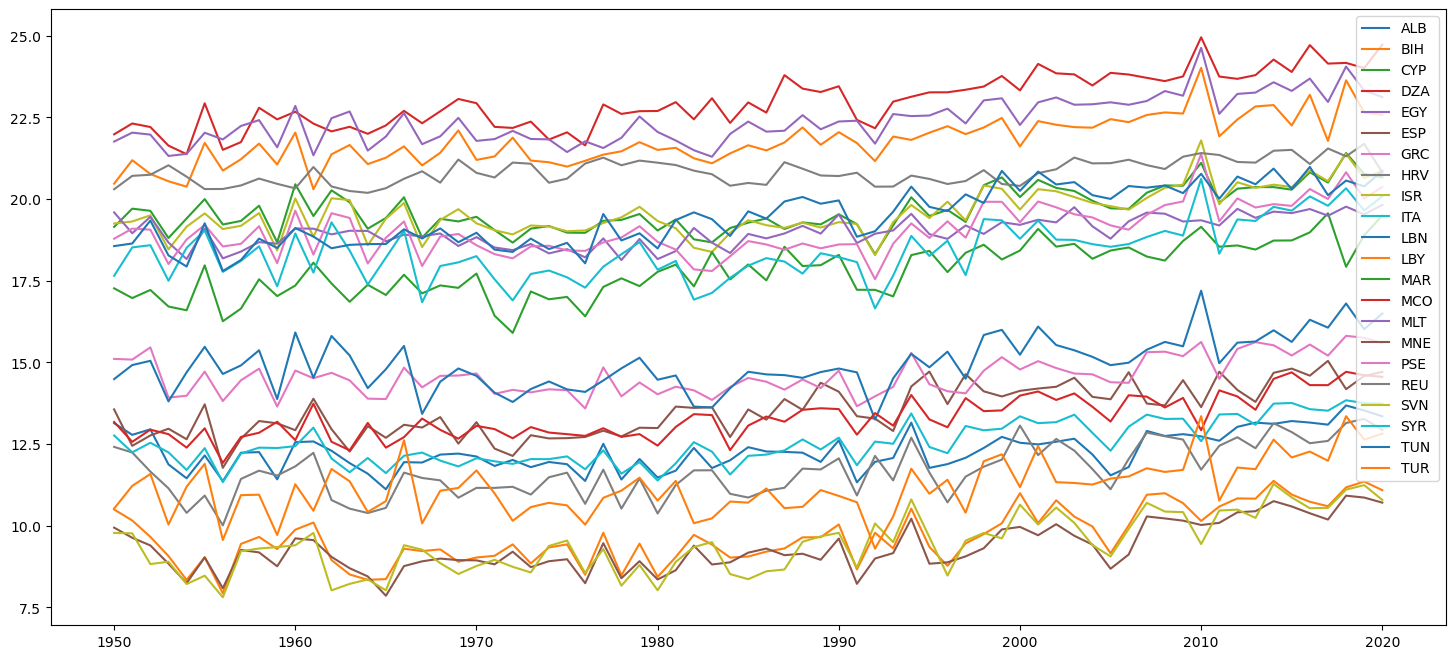

In [324]:
PlotData(YAST)

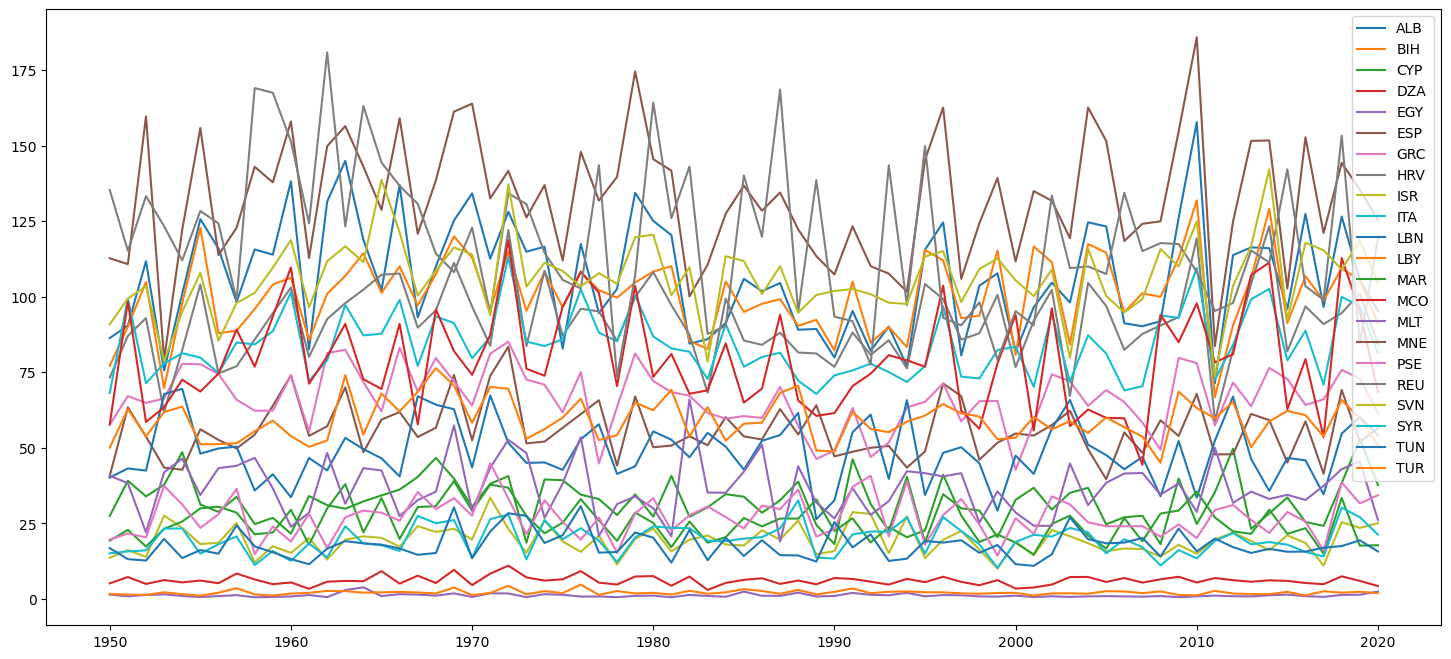

In [325]:
PlotData(YAPR)

Question 2

In this function I find the longest series of 1 and -1 in a given dataFrame for companies

In [2]:
def FindMaxSeries(data, company):
    max_seri = 0
    current_seri = 0
    prev = -2
    for i in data[company]:
        if i == 0:
            prev = i
            current_seri = 0
            continue
            
        if i == prev:
            current_seri += 1
            max_seri = max(max_seri,current_seri)
        else:
            prev = i
            current_seri = 1

    return max_seri

In this function, I calculate the percentage difference between the dataFrames given for two different times and return the result by placing -1 0 or 1 according to the percentage conditions.

In [3]:
def Percentage_to_Binary(OpenPrices, ClosePrices, companies):
    change_percentage = pd.DataFrame(index=OpenPrices.index)
    change_percentage[companies] = 0
    CHANGE = pd.DataFrame(index=OpenPrices.index)

    for i in companies:
        change_percentage[i] = (ClosePrices[i] - OpenPrices[i]) / OpenPrices[i] * 100

    for i in companies:
        CHANGE[i] = 0
        CHANGE[i][change_percentage[i] > 2.5] = 1
        CHANGE[i][change_percentage[i] < -2.5] = -1
    
    return CHANGE

In the next two cells, I first determine the companies whose data I will receive, and then I determine the time interval I will use in the data. Then I download this data with the yf module.

In [4]:
companies = ['GOOG','META', 'CSCO', 'INTC', 'AMD', 'QCOM', 'AAPL', '005930.KS', '1810.HK', 'TSLA']
start = '2019-01-01'
end = '2022-12-31'

In [5]:
data = yf.download(companies, start=start, end=end)

[*********************100%%**********************]  10 of 10 completed


Here, I determine the difference between the daily closing prices and the daily opening prices of the companies in the specified time interval and place -1 0 or 1 according to the percentage conditions. then I calculate the series of days when the companies have the longest profit or loss in this time interval.


In [6]:
CHANGE = Percentage_to_Binary(data["Open"], data["Close"], companies)
Longest_Change = {company: FindMaxSeries(CHANGE,company) for company in companies}
Longest_Change

{'GOOG': 3,
 'META': 3,
 'CSCO': 2,
 'INTC': 2,
 'AMD': 6,
 'QCOM': 3,
 'AAPL': 2,
 '005930.KS': 2,
 '1810.HK': 3,
 'TSLA': 5}

and here I do a calculation like the previous difference calculation, unlike before, I make the comparison with the previous day, so I shift the data down with the shift function, then I delete the first day that is not before with the expression [1:]. then I calculate the longest series again as in the previous data

In [7]:
DIFFERENCE = Percentage_to_Binary(data["Open"].shift(1)[1:], data["Open"][1:], companies)
Longest_Difference = {company: FindMaxSeries(DIFFERENCE,company) for company in companies}
Longest_Difference

{'GOOG': 3,
 'META': 3,
 'CSCO': 2,
 'INTC': 3,
 'AMD': 5,
 'QCOM': 4,
 'AAPL': 3,
 '005930.KS': 3,
 '1810.HK': 4,
 'TSLA': 4}

I didn't use chatgpt directly in a code demonstration while doing this assignment. I can't leave any references as I mostly use sites like GeekforGeeks and pandas.pydata.org
Muhammed Selman Demir 090210340